In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [2]:
filename = "/mnt/home/jzang/ceph/freq_frg/SIAM.KF.U3.0.T1.0.e0.0.h5"
with h5py.File(filename, 'r') as file:
    mesh_bosonic=np.array(file['vertex_total']['mesh_bosonic'])
    mesh_fermionic_1 = np.array(file['vertex_total']['mesh_fermionic_1'])
    mesh_fermionic_2 = np.array(file['vertex_total']['mesh_fermionic_2'])

In [3]:
part=14

In [4]:
filename = f"/mnt/home/jzang/ceph/freq_frg/store_data/vertex_total_uddu_part{part}.h5"
with h5py.File(filename, 'a') as file:
    vertex_uddu=np.array(file['vertex_uddu'])
    vertex_uddu_mean=np.array(file['vertex_uddu_mean'])
    table=np.array(file['parameters'])
    indice=np.array(file['indice'])
    
    

In [5]:
vertex_uddu=vertex_uddu.reshape(vertex_uddu.shape[0],-1)

In [6]:
filename = f"/mnt/home/jzang/ceph/freq_frg/svd/svd_all_vertex_part{part}_50.h5"
#filename= f"/mnt/home/jzang/ceph/freq_frg/svd/train_test_split/svd_all_vertex_part{part}_50.h5"
with h5py.File(filename, 'r') as file:
    U_m=np.array(file['U'])
    S_m=np.array(file['S'])
    Vh_m=np.array(file['Vh'])
    

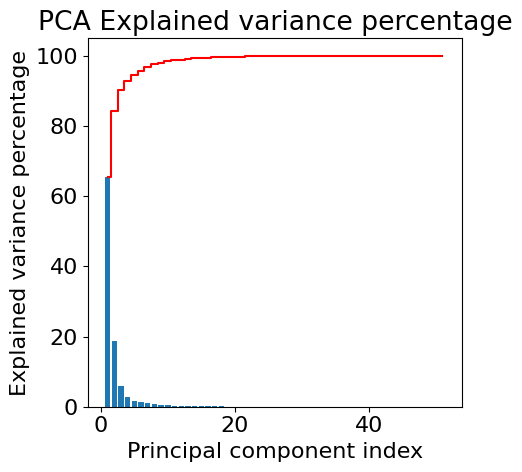

In [7]:

# To calculate the explained variance, square the singular values (s)
exp_var = (S_m**2) / np.sum(S_m**2)
exp_var_ratio = exp_var * 100  # Convert to percentage
# Cumulative explained variance
cum_exp_var = np.cumsum(exp_var_ratio)
plt.figure(figsize=(5,5))
components=51#vertex_uddu.shape[0]
plt.bar(range(1, components+1), exp_var_ratio , align='center',
        label='Individual variance')

plt.step(range(1, components+1), cum_exp_var, where='mid',
         label='Cumulative variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
# plt.legend(loc='right')
plt.title(f"PCA Explained variance percentage")#,T={T}")
plt.tight_layout()
#plt.savefig(f'fig/explain_variance.png',dpi=600, bbox_inches='tight')
plt.show()

In [8]:
# Create a meshgrid for the axes
X, Y = np.meshgrid(mesh_fermionic_1, mesh_fermionic_2)


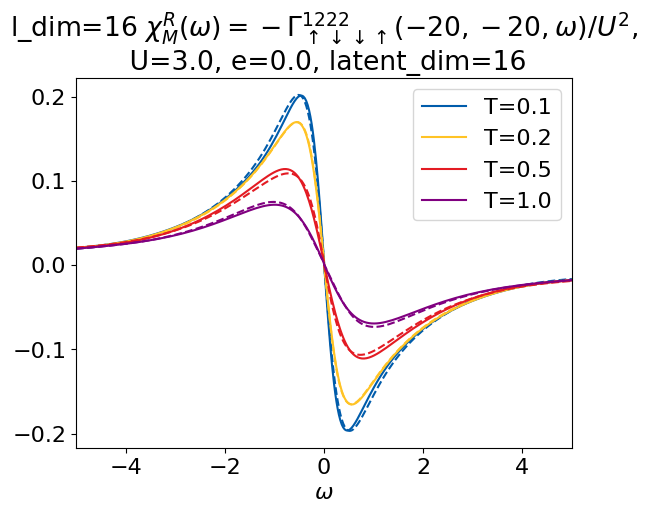

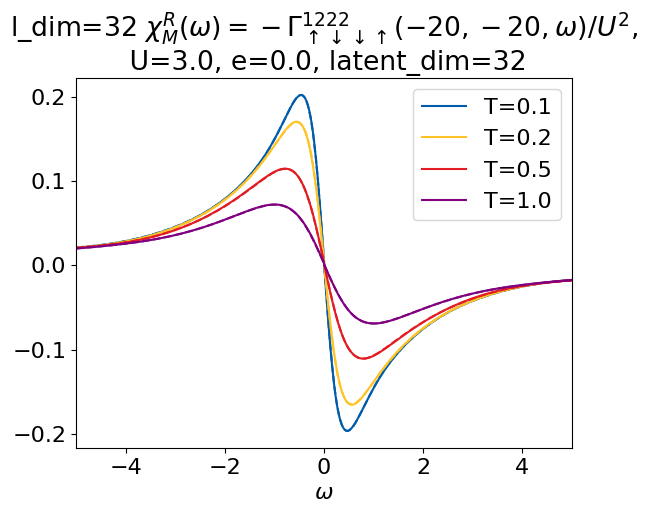

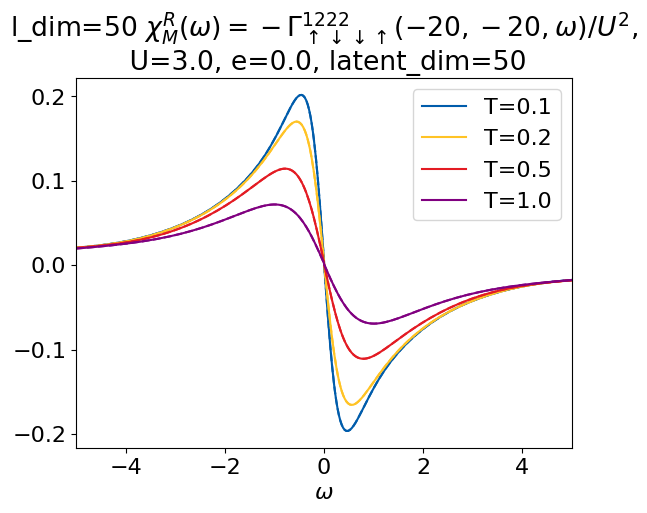

In [9]:
sus_original=(vertex_uddu).reshape(140,201, 101, 101)+vertex_uddu_mean

line_colors = [(0, 92/255, 171/255), (255/255, 195/255, 37/255), (227/255, 27/255, 35/255), "purple"]#,

for set_U in [3.0]:#,2.0,1.0]:
    for latent_dim in [16,32,50]:
        j=0
        using_pca=latent_dim
        reconstructed_v = np.dot(U_m[:,:using_pca] * S_m[:using_pca], Vh_m[:using_pca, :])
        reconstructed_v =(reconstructed_v ).reshape(140,201, 101, 101) + vertex_uddu_mean
        for i, (U,T,e) in enumerate(table):
            if U==set_U and e==0.0:  
                plt.plot(mesh_bosonic,-sus_original[i,:, 0, 0].imag/U**2,label=f"T={T}",color=line_colors[j])
                plt.plot(mesh_bosonic,-reconstructed_v[i,:, 0, 0].imag/U**2,"--",color=line_colors[j])
                j+=1
        plt.xlim(-5,5)
        plt.legend()
        plt.xlabel(r"$\omega$")
    
        plt.title(f"l_dim={latent_dim} "+r"$\chi_{M}^{R}(\omega)=-\Gamma_{\uparrow \downarrow \downarrow \uparrow}^{1222}(-20,-20, \omega) / U^{2}$,"+f"\n U={set_U}, e=0.0, latent_dim={latent_dim}")
        plt.show()     
    

16


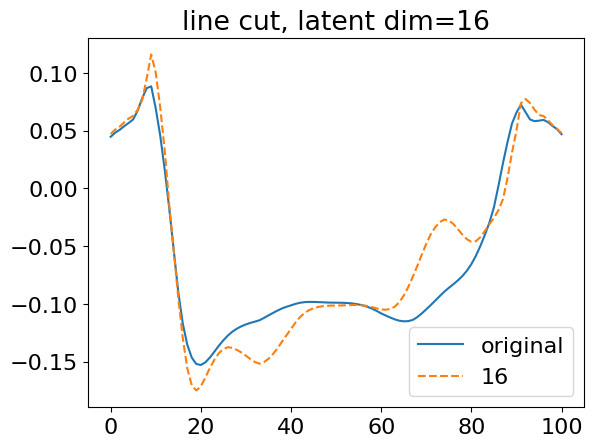

32


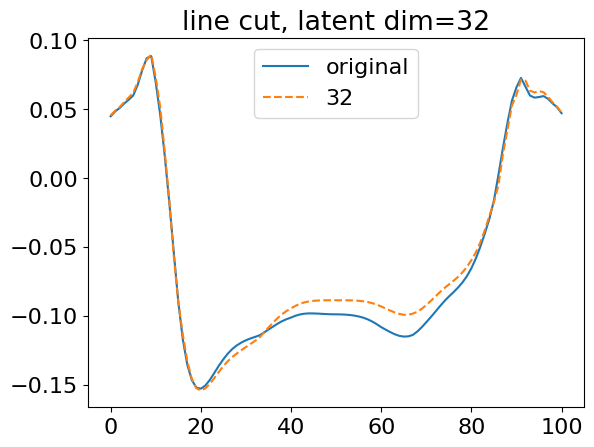

50


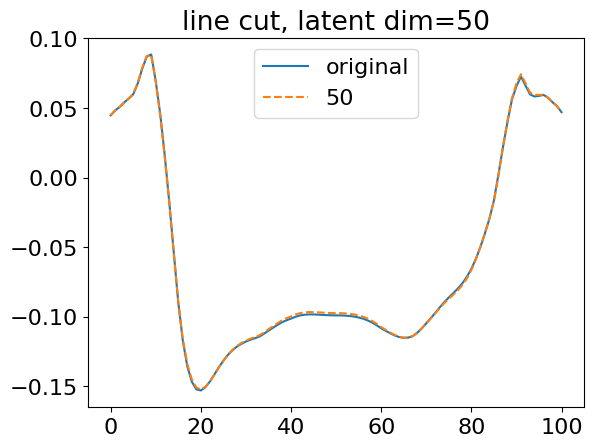

In [10]:
idx=126
errors_pca_list = []
original=vertex_uddu[idx].reshape(201, 101, 101)[20,:,:]
vmax=np.max(np.real(original))
vmin=np.min(np.real(original))
#plt.pcolormesh(X, Y,np.abs(original),vmin=vmin,vmax=vmax)
U,T,mu=table[idx]
plt.title(f"vertex total,U={U}_T={T}_mu={mu}")

for latent_dim in [16,32,50]:
    using_pca=latent_dim
    print(using_pca)
    reconstructed_imag = np.dot(U_m[:,:using_pca] * S_m[:using_pca], Vh_m[:using_pca, :])
    plt.plot(np.real(original[:,50]),label="original")
    plt.plot(np.real(reconstructed_imag[idx].reshape(201, 101, 101)[20,:,50]),"--",label=latent_dim)
    plt.title(f"line cut, latent dim={latent_dim}")
    plt.legend()
    plt.show()
    

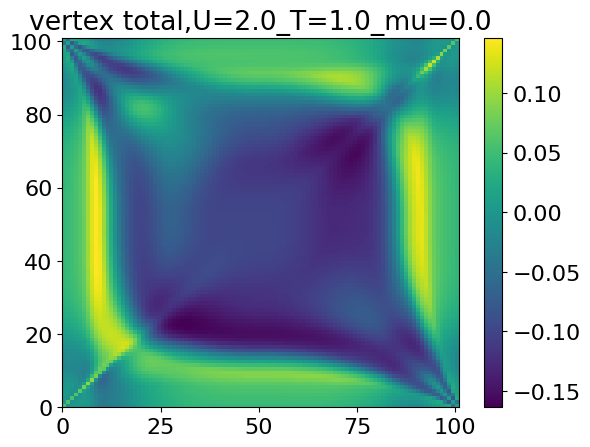

8


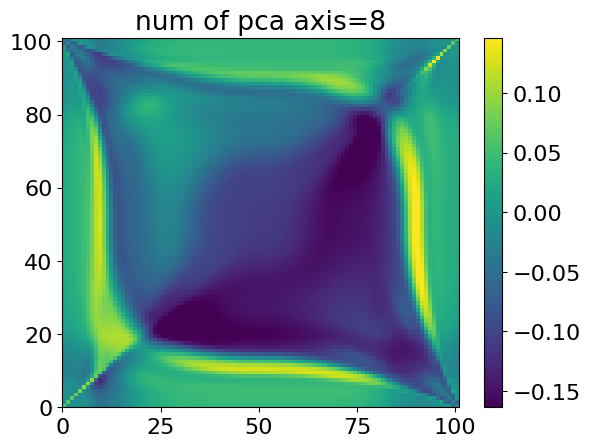

16


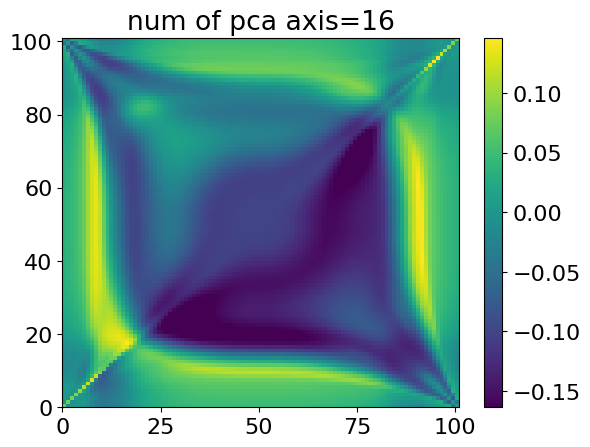

32


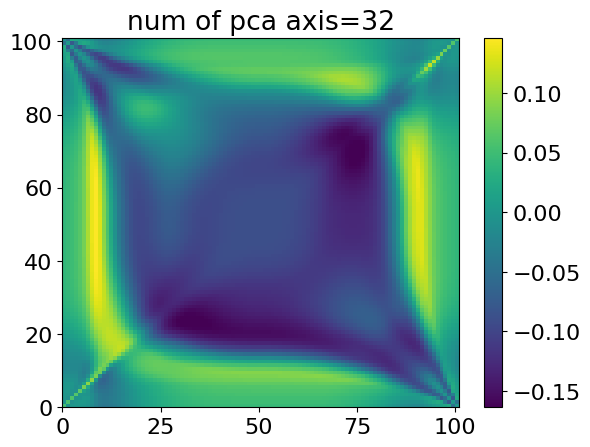

50


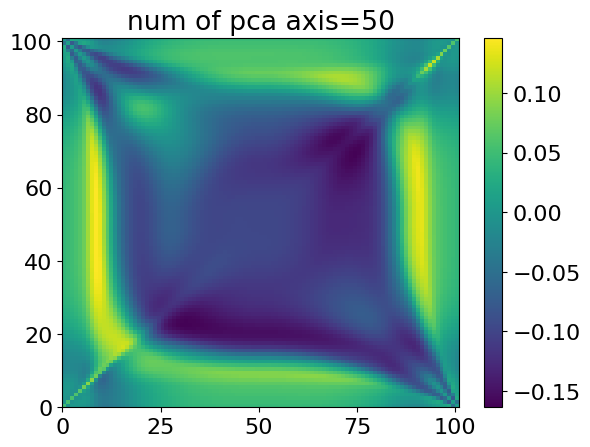

In [11]:
idx=126
errors_pca_list = []
# Plot using pcolormesh
original=vertex_uddu[idx].reshape(201, 101, 101)[20,:,:]
vmax=np.max(np.real(original))
vmin=np.min(np.real(original))
#plt.pcolormesh(X, Y,np.abs(original),vmin=vmin,vmax=vmax)
plt.pcolormesh(np.real(original),vmin=vmin,vmax=vmax)
# plt.xlabel(f"$\omega$")
# plt.ylabel(f"$\omega'$")
plt.colorbar()
U,T,mu=table[idx]
plt.title(f"vertex total,U={U}_T={T}_mu={mu}")
plt.show()

for latent_dim in [8,16,32,50]:
    using_pca=latent_dim
    print(using_pca)
    reconstructed_imag = np.dot(U_m[:,:using_pca] * S_m[:using_pca], Vh_m[:using_pca, :])
    # Calculate error for complex data
    squared_diff_magnitude = np.sum(np.abs(vertex_uddu - reconstructed_imag)**2, axis=1)
    squared_orig_magnitude = np.sum(np.abs(vertex_uddu)**2, axis=1)
    error = np.sqrt(squared_diff_magnitude / squared_orig_magnitude)
    errors_pca_list.append(error)
    plt.pcolormesh(np.real(reconstructed_imag[idx].reshape(201, 101, 101)[20,:,:]),vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.title(f"num of pca axis={using_pca}")
    plt.show()
    

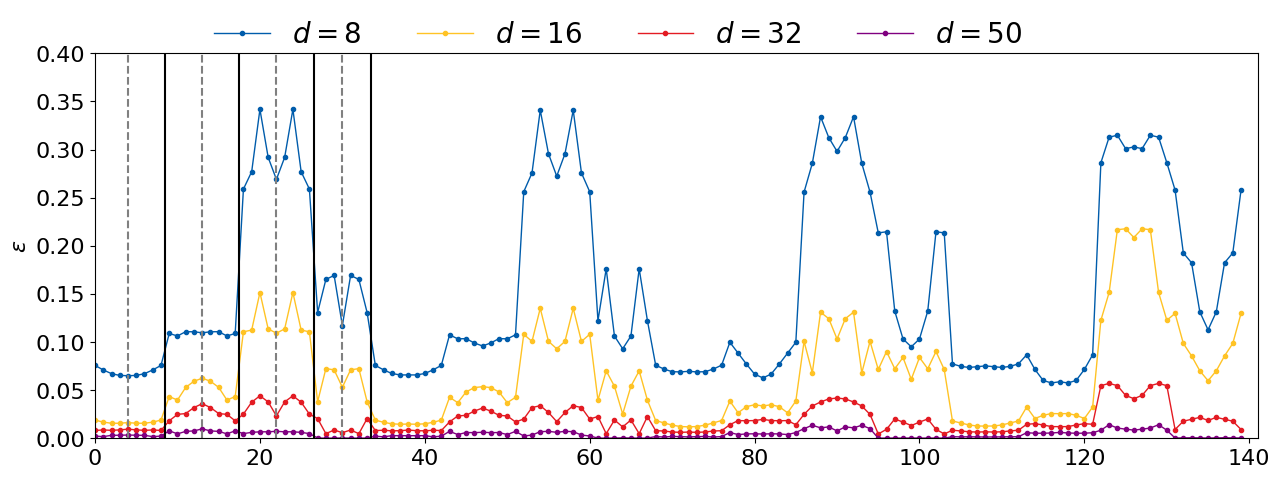

In [13]:
cmap_blue = plt.get_cmap('Blues')
cmap_red = plt.get_cmap('Reds')

line_colors = [(0, 92/255, 171/255), (255/255, 195/255, 37/255), (227/255, 27/255, 35/255), "purple"]#,

line_styles = ['dashed',  'dashdot','dotted','solid']#'dashed',
fig, ax = plt.subplots(figsize=(15,5))
# Plotting the errors for PCA
pca_latent_dims = [8,16,32,50]
for i, latent_dim in enumerate(pca_latent_dims):
    # color = cmap_red((5-i) / 5)  # Adjust intensity based on position
    color=line_colors[i]
    ax.plot( errors_pca_list[i],".-", label=f'$d={latent_dim}$',  color=color,linewidth=1)#linestyle=line_styles[i]
# ax.set_xlabel(f'$t\'$')
ax.set_ylabel(r'$\epsilon$')
ax.legend(loc='upper center', bbox_to_anchor=(0.45, 1.15), ncol=4, fontsize=20, frameon=False)
for x in [4,13,22,30]:
    plt.axvline(x=x, color="gray",linestyle="dashed")
for x in [8.5,17.5,26.5,33.5]:
    plt.axvline(x=x, color="black",linestyle="solid")

ax.set_ylim(0,0.4)
plt.xlim(0,141)
plt.show()


In [37]:
# V_k = Vh[:components, :].conjugate().T  #complex numbers

projection = np.dot(vertex_uddu, Vh_m[:2, :].conjugate().T)
projection.shape

(140, 2)

In [48]:
import numpy as np
a = np.array([1+2j,3+4j])
b = np.array([5+6j,7+8j])
np.vdot(a, b),np.dot(a.conj(), b),np.dot(a, b.conj())


((70-8j), (70-8j), (70+8j))

In [45]:
a.shape

(2,)

In [44]:
vertex_uddu.shape

(140, 2050401)

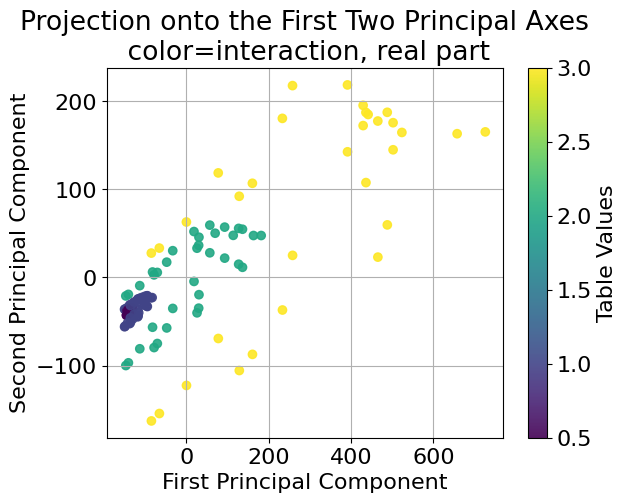

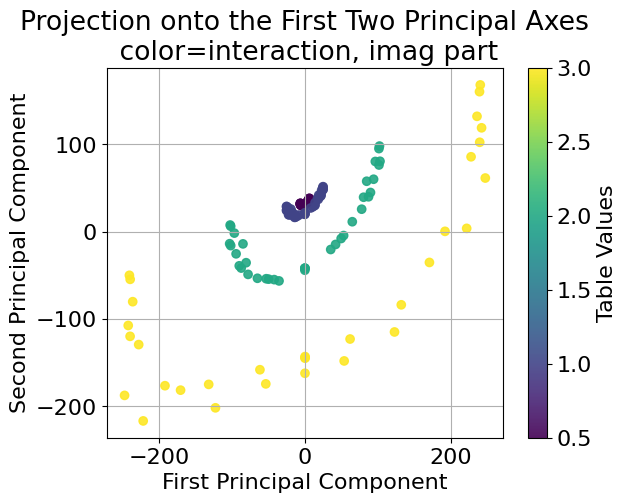

In [49]:
# Project the original data onto the first two principal components
# Convert Vh to V
V_m = Vh_m[:2, :].conj().T

# Project the data onto the principal components
projection = np.dot(vertex_uddu.conj(), V_m)
# Plot the projection with colors determined by 'table'
plt.scatter(projection[:, 0], projection[:, 1], c=table[:,0], cmap='viridis', alpha=0.9)  # cmap can be changed
plt.colorbar(label='Table Values')  # Add a colorbar to show the mapping from 'table' values to colors
plt.title(f'Projection onto the First Two Principal Axes\n color=interaction, real part')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

plt.scatter(projection[:, 0].imag, projection[:, 1].imag, c=table[:,0], cmap='viridis', alpha=0.9)  # cmap can be changed
plt.colorbar(label='Table Values')  # Add a colorbar to show the mapping from 'table' values to colors
plt.title(f'Projection onto the First Two Principal Axes\n color=interaction, imag part')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()



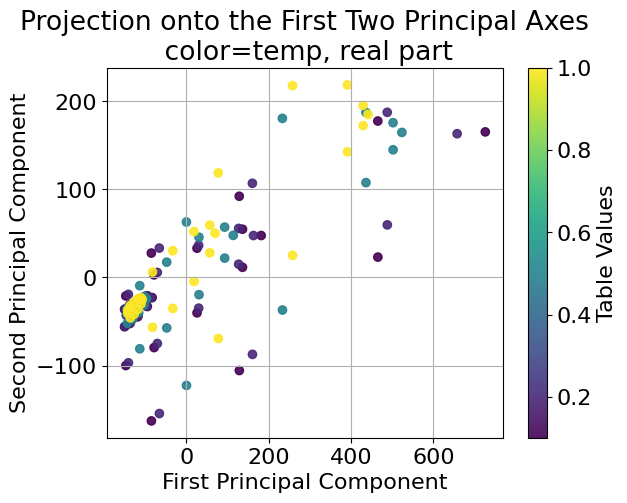

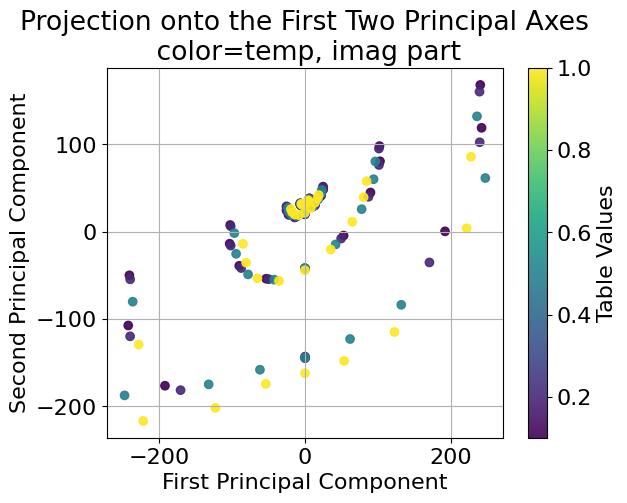

In [50]:
# Project the original data onto the first two principal components
# Convert Vh to V
V_m = Vh_m[:2, :].conj().T

# Project the data onto the principal components
projection = np.dot(vertex_uddu.conj(), V_m)
# Plot the projection with colors determined by 'table'
plt.scatter(projection[:, 0], projection[:, 1], c=table[:,1], cmap='viridis', alpha=0.9)  # cmap can be changed
plt.colorbar(label='Table Values')  # Add a colorbar to show the mapping from 'table' values to colors
plt.title(f'Projection onto the First Two Principal Axes\n color=temp, real part')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

plt.scatter(projection[:, 0].imag, projection[:, 1].imag, c=table[:,1], cmap='viridis', alpha=0.9)  # cmap can be changed
plt.colorbar(label='Table Values')  # Add a colorbar to show the mapping from 'table' values to colors
plt.title(f'Projection onto the First Two Principal Axes\n color=temp, imag part')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()



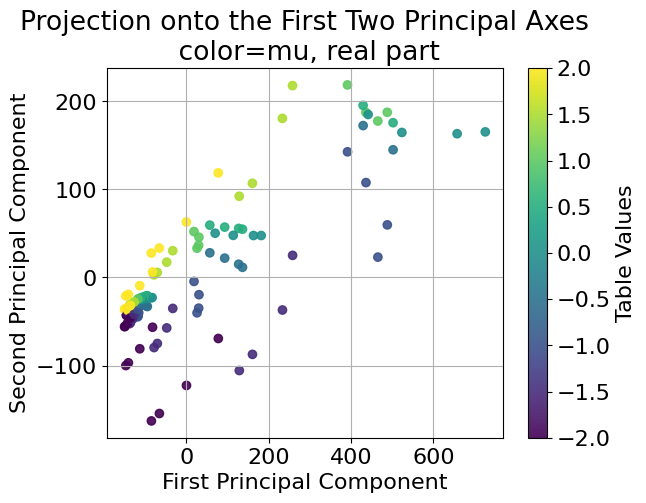

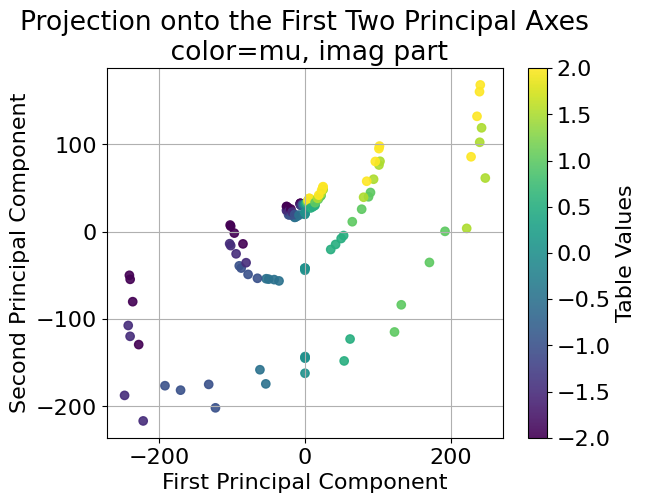

In [51]:
# Project the original data onto the first two principal components
# Convert Vh to V
V_m = Vh_m[:2, :].conj().T

# Project the data onto the principal components
projection = np.dot(vertex_uddu.conj(), V_m)
# Plot the projection with colors determined by 'table'
plt.scatter(projection[:, 0], projection[:, 1], c=table[:,2], cmap='viridis', alpha=0.9)  # cmap can be changed
plt.colorbar(label='Table Values')  # Add a colorbar to show the mapping from 'table' values to colors
plt.title(f'Projection onto the First Two Principal Axes\n color=mu, real part')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

plt.scatter(projection[:, 0].imag, projection[:, 1].imag, c=table[:,2], cmap='viridis', alpha=0.9)  # cmap can be changed
plt.colorbar(label='Table Values')  # Add a colorbar to show the mapping from 'table' values to colors
plt.title(f'Projection onto the First Two Principal Axes\n color=mu, imag part')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()



/mnt/home/jzang/frg/torch_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/home/jzang/frg/torch_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


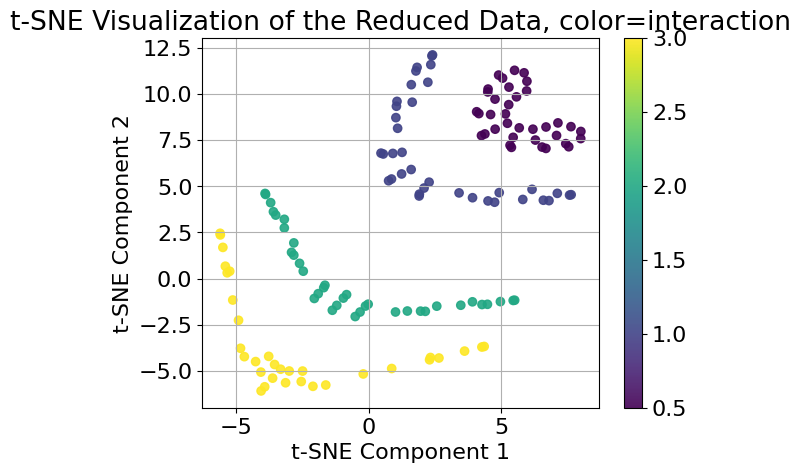

In [62]:
from sklearn.manifold import TSNE
# Project the data onto the first few principal components
V_m = Vh_m[:4, :].conj().T
# Project the data onto the principal components
projected_data = np.dot(vertex_uddu.conj(), V_m)
real_part = projected_data.real  # Extract the real parts
imag_part = projected_data.imag  # Extract the imaginary parts

# Concatenate the real and imaginary parts along axis 1 (doubling the feature space)
combined_data = np.hstack((real_part, imag_part))

# Apply t-SNE to the reduced data
tsne = TSNE(n_components=2, random_state=42)  # 2D t-SNE
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE output
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],  c=table[:,0], cmap='viridis', alpha=0.9)
plt.colorbar()
plt.title('t-SNE Visualization of the Reduced Data, color=interaction')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

/mnt/home/jzang/frg/torch_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/home/jzang/frg/torch_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


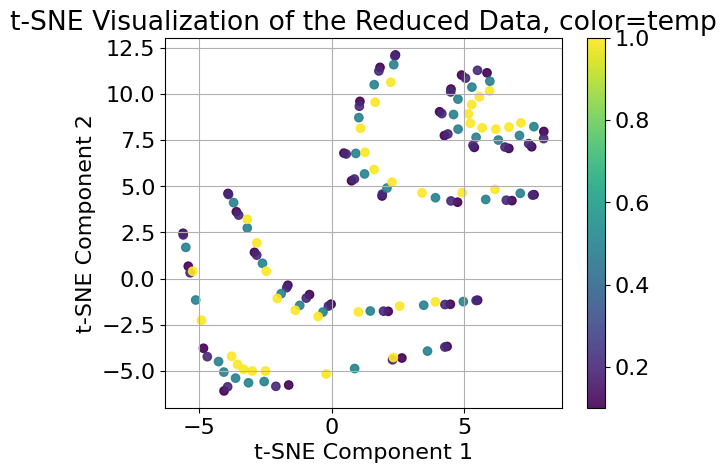

In [63]:
from sklearn.manifold import TSNE
# Project the data onto the first few principal components
V_m = Vh_m[:4, :].conj().T
# Project the data onto the principal components
projected_data = np.dot(vertex_uddu.conj(), V_m)
real_part = projected_data.real  # Extract the real parts
imag_part = projected_data.imag  # Extract the imaginary parts

# Concatenate the real and imaginary parts along axis 1 (doubling the feature space)
combined_data = np.hstack((real_part, imag_part))

# Apply t-SNE to the reduced data
tsne = TSNE(n_components=2, random_state=42)  # 2D t-SNE
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE output
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],  c=table[:,1], cmap='viridis', alpha=0.9)
plt.colorbar()
plt.title('t-SNE Visualization of the Reduced Data, color=temp')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

/mnt/home/jzang/frg/torch_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/home/jzang/frg/torch_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


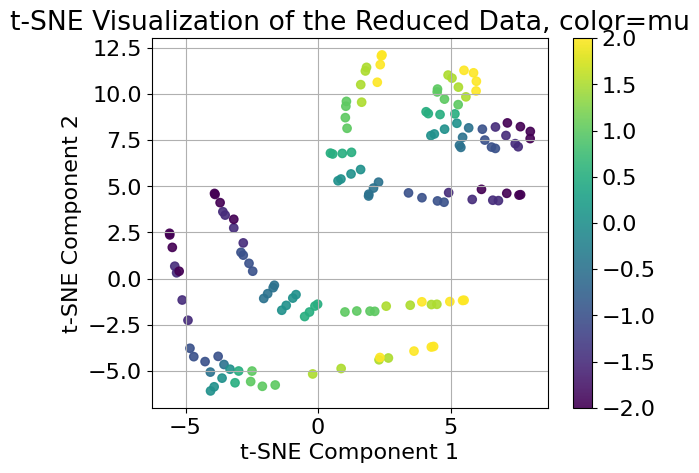

In [64]:
from sklearn.manifold import TSNE
# Project the data onto the first few principal components
V_m = Vh_m[:4, :].conj().T
# Project the data onto the principal components
projected_data = np.dot(vertex_uddu.conj(), V_m)
real_part = projected_data.real  # Extract the real parts
imag_part = projected_data.imag  # Extract the imaginary parts

# Concatenate the real and imaginary parts along axis 1 (doubling the feature space)
combined_data = np.hstack((real_part, imag_part))

# Apply t-SNE to the reduced data
tsne = TSNE(n_components=2, random_state=42)  # 2D t-SNE
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE output
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],  c=table[:,2], cmap='viridis', alpha=0.9)
plt.colorbar()
plt.title('t-SNE Visualization of the Reduced Data, color=mu')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

In [76]:
# Define the target values for the first column
target_values = [0.5, 1, 2, 3]

group_U_indices = {}
for value in target_values:
    indices = np.where(table[:, 0] == value)[0]
    group_U_indices[value] = indices
# Print the results
for key, indices in group_U_indices.items():
    print(f"Indices for group  U={key}: {indices}")
target_values = [0.1,0.2,0.5,1.0]
group_T_indices = {}
for value in target_values:
    indices = np.where(table[:, 1] == value)[0]
    group_T_indices[value] = indices
# Print the results
for key, indices in group_T_indices.items():
    print(f"Indices for group  T={key}: {indices}")

Indices for group  U=0.5: [  0   1   2   3   4   5   6   7   8  34  35  36  37  38  39  40  41  42
  68  69  70  71  72  73  74  75  76 104 105 106 107 108 109 110 111 112]
Indices for group  U=1: [  9  10  11  12  13  14  15  16  17  43  44  45  46  47  48  49  50  51
  77  78  79  80  81  82  83  84  85 113 114 115 116 117 118 119 120 121]
Indices for group  U=2: [ 18  19  20  21  22  23  24  25  26  52  53  54  55  56  57  58  59  60
  86  87  88  89  90  91  92  93  94 122 123 124 125 126 127 128 129 130]
Indices for group  U=3: [ 27  28  29  30  31  32  33  61  62  63  64  65  66  67  95  96  97  98
  99 100 101 102 103 131 132 133 134 135 136 137 138 139]
Indices for group  T=0.1: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Indices for group  T=0.2: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Indices for group  T=0.5: [ 68  69  70  71  72  73  74  75  76  77  

In [78]:
vertex_uddu[group_T_indices[0.1]].shape

(34, 2050401)

In [86]:
def cosine_similarity_complex(vector_a, vector_b):
    # Dot product of vector_a and the conjugate of vector_b
    dot_product = np.dot(vector_a, np.conj(vector_b))
    # Norms of the original vectors
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)
    # Cosine similarity calculation
    similarity = dot_product / (norm_a * norm_b)
    return similarity

In [92]:
def cosine_similarity(vector_a, vector_b):
    dot_product = np.dot(vector_a, vector_b)
    # Norms of the original vectors
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)
    # Cosine similarity calculation
    similarity = dot_product / (norm_a * norm_b)
    return similarity

In [107]:

# Cosine similarities between the vertices at different interaction strengths
print("Cosine similarity between vertex mean of two temperatures for real and imaginary part:" )

for T1 in [0.1,0.2,0.5,1.0]:
    for T2 in [0.1,0.2,0.5,1.0]:
        if T2>T1:
            vertex_1=np.mean(vertex_uddu[group_T_indices[T1]],axis=0)
            vertex_2=np.mean(vertex_uddu[group_T_indices[T2]],axis=0)
            print(f"T={T1} and T={T2}:")
            cos_real=np.around(cosine_similarity(vertex_1.real, vertex_2.real),3)
            cos_imag=np.around(cosine_similarity(vertex_1.imag, vertex_2.imag),3)
            print("real: ", cos_real,", imag:", cos_imag)


Cosine similarity between vertex mean of two temperatures for real and imaginary part:
T=0.1 and T=0.2:
real:  0.966 , imag: 0.91
T=0.1 and T=0.5:
real:  -0.536 , imag: -0.337
T=0.1 and T=1.0:
real:  -0.955 , imag: -0.919
T=0.2 and T=0.5:
real:  -0.614 , imag: -0.463
T=0.2 and T=1.0:
real:  -0.918 , imag: -0.844
T=0.5 and T=1.0:
real:  0.281 , imag: -0.023


In [103]:
vertex_1.shape

(2050401,)

In [106]:

# Cosine similarities between the vertices at different interaction strengths
print("Cosine similarity between vertex mean of two interactions for real and imaginary part:" )

for U1 in [0.5,1.0,2.0,3.0]:
    for U2 in [0.5,1.0,2.0,3.0]:
        if U2>U1:
            vertex_1=np.mean(vertex_uddu[group_U_indices[U1]],axis=0)
            vertex_2=np.mean(vertex_uddu[group_U_indices[U2]],axis=0)
            print(f"U={U1} and U={U2}:")
            cos_real=np.around(cosine_similarity(vertex_1.real, vertex_2.real),3)
            cos_imag=np.around(cosine_similarity(vertex_1.imag, vertex_2.imag),3)
            print("real: ", cos_real,", imag:", cos_imag)


Cosine similarity between vertex mean of two interactions for real and imaginary part:
U=0.5 and U=1.0:
real:  0.997 , imag: 0.996
U=0.5 and U=2.0:
real:  -0.428 , imag: -0.474
U=0.5 and U=3.0:
real:  -0.993 , imag: -0.991
U=1.0 and U=2.0:
real:  -0.361 , imag: -0.404
U=1.0 and U=3.0:
real:  -0.999 , imag: -0.998
U=2.0 and U=3.0:
real:  0.321 , imag: 0.353
